## Ukraine Russia war Twitter entity recognition and sentiment analysis

In [19]:
# https://quadlayers.com/display-code-in-wordpress/
# import libraries
!python -m spacy download en_core_web_md
!python -m textblob.download_corpora

import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
import matplotlib.pyplot as plt

import time # for testing function speed
import numpy as np
from datetime import datetime
from deep_translator import GoogleTranslator
import re
import textfeatures as tf

#import os
import csv
import gzip

nlp = spacy.load('en_core_web_md')

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 393.8 kB/s eta 0:01:49
     --------------------------------------- 0.0/42.8 MB 393.8 kB/s eta 0:01:49
     --------------------------------------- 0.1/42.8 MB 393.8 kB/s eta 0:01:49
     --------------------------------------- 0.1/42.8 MB 350.1 kB/s eta 0:02:02
     --------------------------------------- 0.1/42.8 MB 481.4 kB/s eta 0:01:29
     --------------------------------------- 0.2/42.8 MB 499.5 kB/s eta 0:01:26
     --------------------------------------- 0.2/42.8 MB 562.0 kB/s eta 0:01:16
     --------------------------------------- 0.3/42.8 MB 655.2 kB/s eta 0:01:05
     --------------------------------------- 0.3/42.8 MB 655.2 kB/s eta 0:01:05
     --------------------------------------- 0.3/42.8 MB 6

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [20]:
# get files
path='C:/Users/alexd/Documents/ukraine_war_analysis/twitter/20230201_UkraineCombinedTweetsDeduped.csv.gzip'
data0 = pd.read_csv(path, compression='gzip')

In [21]:
# remove irrelevant columns, show the final data ready for the analysis
data0=pd.DataFrame(data=data0,columns=['username', 'text', 'totaltweets','followers', 'location', 'extractedts'])
data0['text'].dropna()
data_test = data0.head(50)
data_test.head()


,username,text,totaltweets,followers,location,extractedts
0,1MedyaNews,"📌 ""I consider it absolutely logical that any f...",5311,3192,"Kurdistan, Worldwide",2023-02-01 08:38:08.838942
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,2023-02-01 07:17:46.132719
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",2023-02-01 08:38:08.827016
3,aaanewsworld,◆F-2戦闘機 F-2A/B \n米国のF-16を、日本の運用の考え方や地理的な特性に合わせ...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",2023-02-01 10:57:38.082721
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,2023-02-01 01:11:03.853106


In [22]:
# translate to english and remove emojis
def rmv_emoji_and_trans_to_en(data, rmv_stopwords=False):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)
    store = pd.DataFrame({'username': [], 'text': [], 'totaltweets': [], 'followers': [], 'location': [], 'extractedts': []})
    for _, row in data.iterrows():
        text = emoji_pattern.sub(r'', row['text'])
        text = GoogleTranslator(source='auto', target='en').translate(text)
        
        if rmv_stopwords:
            stopwords = spacy.lang.en.stop_words.STOP_WORDS
            doc = nlp(text)
            text = ' '.join([word for word in doc if not word.is_stop])
        
        store2 = pd.DataFrame({
            'username': row['username'], 
            'text': text, 
            'totaltweets': row['totaltweets'], 
            'followers': row['followers'], 
            'location': row['location'], 
            'extractedts': pd.to_datetime(data0['extractedts']).dt.strftime('%d/%m/%Y')
        }, index=[0])
        store = pd.concat([store, store2])
    return store

# path='C:/Users/alexd/Documents/ukraine_war_analysis/twitter/20230201_UkraineCombinedTweetsDeduped.csv.gzip'
# data0 = pd.read_csv(path, compression='gzip')

data=pd.DataFrame(data=data_test,columns=['username', 'text', 'totaltweets','followers', 'location', 'extractedts'])
data['text'].dropna()
#data = twitter_analysis(data)
data_en = rmv_emoji_and_trans_to_en(data)

data_en.head()

,username,text,totaltweets,followers,location,extractedts
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311.0,3192.0,"Kurdistan, Worldwide",01/02/2023
0,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540.0,46.0,NaN,01/02/2023
0,isciences,3-month #water anomalies forecast January 2023...,7972.0,1301.0,"Ann Arbor, MI, USA",01/02/2023
0,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341.0,5.0,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023
0,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716.0,2553.0,Canada,01/02/2023


In [23]:
# sentiment analysis 
# https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/
def sentiment(data):
    store = []
    for row in data.itertuples():
        testimonial = TextBlob(row.text)
        store.append({'username':row.username, 
                      'text':row.text, 
                      'totaltweets':int(row.totaltweets), 
                      'followers':int(row.followers), 
                      'location':row.location, 
                      'extractedts':row.extractedts,
                      'polarity': testimonial.sentiment.polarity })
    return pd.DataFrame(store)

data_sentiment = sentiment(data_en)   
data_sentiment.head()

,username,text,totaltweets,followers,location,extractedts,polarity
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,01/02/2023,0.000000
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000
3,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.266667
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667


In [24]:
def get_entities(data):
    def extract_entities(text):
        # IMPROVE ALSO STORE HASTAGS (ALWAYS START WITH #, ONE TEXT STRING)
        # Extract entities from text
        doc = nlp(text)
        entities = {}
        for ent in doc.ents:
            if ent.label_ in ['GPE', 'ORG', 'PERSON']:
                if ent.label_ not in entities:
                    entities[ent.label_] = set()
                entities[ent.label_].add(ent.text.lower())
        return entities

    data['entities'] = data['text'].apply(extract_entities)
    # Convert the entities dictionary to separate columns in the DataFrame
    data = pd.concat([data, data['entities'].apply(pd.Series, dtype='object')], axis=1)
    data.drop(columns=['entities'], inplace=True)
    return data


#path='C:/Users/alexd/Documents/ukraine_war_analysis/twitter/20230201_UkraineCombinedTweetsDeduped.csv.gzip'
#data0 = pd.read_csv(path, compression='gzip')

data=pd.DataFrame(data=data_sentiment,columns=['username', 'text', 'totaltweets','followers', 'location', 'extractedts'])
data['text'].dropna()
dataset_entities = get_entities(data_sentiment) 
dataset_entities.head()

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000,"{iran, syria, turkey, russia}",{sergey lavrov},NaN
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,01/02/2023,0.000000,{usa},NaN,{bakhmut\n#canda}
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000,"{russia, tajikistan}",NaN,NaN
3,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.266667,"{russia, japan, the united states}",{f-2a},"{ukrainerussia #ukraine #, ukrainewar, f-2}"
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667,NaN,NaN,"{blackpeople \n, legacy of black music}"


final dataset:
- column 1: the tweet
- columns 2: amount of followers
- column 3: total tweets
- column 4: date of the tweet
- column 5: sentiment for the tweet
- column 6 - x: columns each one for an entity type (person, event, etc)

-
- maybe more relevant (location of the tweet?)


In [88]:
data_entities.iloc[0]['text']

'"i consider it absolutely logical that any further communication on bringing relations between #turkey and #syria back to normal will also involve #russia and #iran," said russia’s top diplomat sergey lavrov.  https://t.co/tmw1rgh6b4'

In [25]:
# speed test
print('rows: ' + str(len(data_test.index)))
start = time.time()
data_en = rmv_emoji_and_trans_to_en(data_test)
end1 = time.time()
print('rmv_emoji_and_trans_to_en:')
print(end1 - start)

start = time.time()
data_sentiment = sentiment(data_en)
end2 = time.time()
print('sentiment: ')
print(end2 - start)

start = time.time()
get_entities(data_sentiment) 
end3 = time.time()
print('get_entities: ')
print(end3 - start)
total_time = end1 + end2 + end3
print('-------------')
print('total time: ')
print(total_time/100000000)

rows: 50
rmv_emoji_and_trans_to_en:
29.661677837371826
sentiment: 
0.021033287048339844
get_entities: 
0.6911368370056152
-------------
total time: 
50.3588248712379


In [108]:
start = time.time()
print("hello")
end = time.time()
print(end - start)

get_entities(sentiment(rmv_emoji_and_trans_to_en(data_test)))

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000,"{iran, turkey, russia, syria}",{sergey lavrov},NaN
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,01/02/2023,0.000000,"{ukraine, germany}",NaN,{bakhmut}
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000,"{tajikistan, russia}",{centralasia},{uralmountains}
3,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.266667,"{russia, ukraine, japan, the united states}",NaN,"{f-2, f-2a/b, ukrainerussia}"
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667,"{oakville, canada, beaudixon, oakvillecentre}","{ontario https://t.co/tj5t9htxox, blackpeople}","{@beauslips, legacy of black music, spirit}"
...,...,...,...,...,...,...,...,...,...,...
95,TheWizardOfG,Ayo #NATO and #NAFO what is going on fellas? U...,801,7,54 68 65 20 4d 61 74 72 69 78,01/02/2023,0.500000,{ukraine},"{nafo, 🤔🧐\n\nwho}",{ayo #nato}
96,louscrews,#NATO has been involved in hybrid war against ...,6925,117,New New York,01/02/2023,0.150000,"{ukraine, russia, moscow}",{lavrov},{nato}
97,GosnDisciplina,@walter_report You cannot take one house witho...,2700,126,Belgrade,01/02/2023,0.000000,NaN,NaN,NaN
98,skalska_o,"The mood, or rather the state, is such that I ...",1655,286,Львів,01/02/2023,0.000000,NaN,{ros},NaN


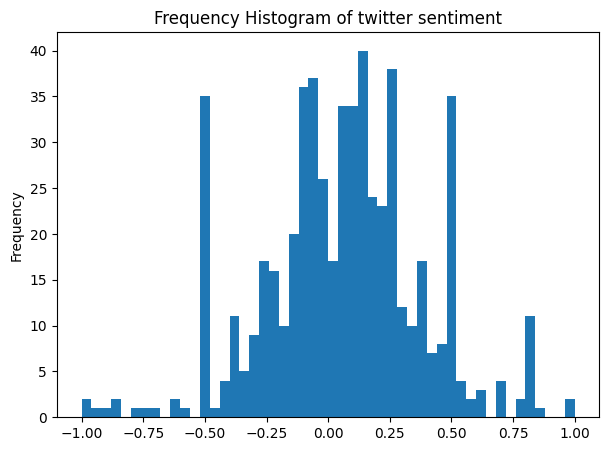

In [18]:
removed_zero = dataset_entities[dataset_entities.iloc[:,6] != 0]
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
x = removed_zero['polarity']
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram of twitter sentiment', ylabel='Frequency');

In [161]:
dataset_entities[dataset_entities.iloc[:,6]>= 0.3 ] 
dataset_entities[dataset_entities.iloc[:,6]<= -0.55 ] 

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG
255,grandmaster_pip,While our mainstream media is still rushing li...,250,643,Hauptstadt Berlin,01/02/2023,-0.6250,"{usa, barbarked, ukraine}",NaN,{rand corporation}
350,DotNewsUpdates,Cold temperatures to end soon for Calgary and ...,46874,51,WorldWide,01/02/2023,-0.6000,"{calgary, canada}",NaN,NaN
484,HugoBor73884636,The Yankees came to Russia to film the PCM Wag...,35735,3205,"Viamão, RS, Brasil",01/02/2023,-0.8750,{russia},{kranodar},"{yankees, pcm wagner}"
485,IamOSFA,What say U @POTUS @SecBlinken @jensstoltenberg...,1377,17,NaN,01/02/2023,-0.9000,NaN,"{putin, @jensstoltenberg, @erinburnett https:/...",NaN
599,kumr00,Horrible Footage!! Elite Ukrainian troops brut...,17835,144,سلطنة عمان,01/02/2023,-0.6250,"{ukraine, germany}","{bakhmut, bakhmut\n https://t.co/fyh9hshjkz}",NaN
681,AmoneBoj,"Ukraine war video footage, Drone Attack, Russi...",5845,11,NaN,01/02/2023,-0.8750,"{odesa, canada, russia, germany, ukraine}",{bakhmut\n https://t.co/zmhxxboj6h},"{bakhmut, brutal attack\n #}"
721,AmoneBoj,Bakhmut. Horrible Footage! #shorts #warinukrai...,5888,12,NaN,01/02/2023,-1.0000,"{canada, ukraine, germany}",{bakhmut\n https://t.co/pdfvqernff},{bakhmut}
742,yusr18413764,INSANE UNSEEN Trench Combat Footage - Ukraine ...,6403,35,NaN,01/02/2023,-1.0000,"{ukraine, germany}",NaN,NaN
752,SirrK,V V Ukraine Rush Busters\n\n:(\n\n.@cspanwj .@...,277486,1782,cyberspace,01/02/2023,-0.7500,{usa},{https://t.co/u9popcim7p},{neda}
853,NewsExplorerFr,#Ukraine “Very dangerous people” – Wagner conv...,13968,15,France,01/02/2023,-0.7800,{ukraine},{wagner},NaN


In [15]:
# example code: how to measure function run time.
start = time.time()
get_entities(data_sentiment) 
end3 = time.time()
print('get_entities: ')
print(end3 - start)

get_entities: 
13.599030017852783


In [52]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
import matplotlib.pyplot as plt

import time # for testing function speed
import numpy as np
from datetime import datetime
from deep_translator import GoogleTranslator
import re
import textfeatures as tf

#import os
import csv
import gzip

nlp = spacy.load('en_core_web_md')

def twitter_analysis(data):

    nlp = spacy.load('en_core_web_md')
    def rmv_emoji_and_trans_to_en(data, rmv_stopwords=False):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)
        store = pd.DataFrame({'username': [], 'text': [], 'totaltweets': [], 'followers': [], 'location': [], 'extractedts': []})
        for _,row in data.iterrows():
            text = emoji_pattern.sub(r'', row['text'])
            text = re.sub(r'http\S+', '', text).replace('\n','')
            text = GoogleTranslator(source='auto', target='en').translate(text)

            if rmv_stopwords:
                stopwords = spacy.lang.en.stop_words.STOP_WORDS
                doc = nlp(text)
                text = ' '.join([word for word in doc if not word.is_stop])
            store2 = pd.DataFrame({
                'username': row['username'], 
                'text': text, 
                'totaltweets': row['totaltweets'], 
                'followers': row['followers'], 
                'location': row['location'], 
                'extractedts': pd.to_datetime(data0['extractedts']).dt.strftime('%d/%m/%Y')
                }, index=[0])
            store = pd.concat([store, store2])
        return store
    
    def sentiment(data):
        store = []
        for row in data.itertuples():
            testimonial = TextBlob(row.text)
            store.append({'username':row.username, 
                          'text':row.text, 
                          'totaltweets':int(row.totaltweets), 
                          'followers':int(row.followers), 
                          'location':row.location, 
                          'extractedts':row.extractedts,
                          'polarity': testimonial.sentiment.polarity })
        return pd.DataFrame(store)
    
    def get_entities(data):
        def extract_entities(text):
            # Extract entities from text
            doc = nlp(text)
            entities = {}
            for ent in doc.ents:
                if ent.label_ in ['GPE', 'ORG', 'PERSON']:
                    if ent.label_ not in entities:
                        entities[ent.label_] = set()
                    entities[ent.label_].add(ent.text.lower())
            return entities

        data['entities'] = data['text'].apply(extract_entities)
        # Convert the entities dictionary to separate columns in the DataFrame
        data = pd.concat([data, data['entities'].apply(pd.Series, dtype='object')], axis=1)
        data.drop(columns=['entities'], inplace=True)
        return data
    
    data_en = rmv_emoji_and_trans_to_en(data)
    data_sentiment = sentiment(data_en)
    dataset_entities = get_entities(data_sentiment) 
    dataset_output = pd.DataFrame(tf.hashtags(dataset_entities, "text", "hastags"))
    return dataset_output

In [53]:
# get files
path='C:/Users/alexd/Documents/ukraine_war_analysis/twitter/20230201_UkraineCombinedTweetsDeduped.csv.gzip'
data0 = pd.read_csv(path, compression='gzip')

data=pd.DataFrame(data=data0,columns=['username', 'text', 'totaltweets','followers', 'location', 'extractedts'])
data['text'].dropna()
data = data.head(50)

start = time.time()
data = twitter_analysis(data)
end = time.time()
data.to_csv('DEMO.csv', header=True, index=False) 

get_entities(data_sentiment) 

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000,"{iran, syria, turkey, russia}",{sergey lavrov},NaN
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,01/02/2023,0.000000,{usa},NaN,{bakhmut\n#canda}
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000,"{russia, tajikistan}",NaN,NaN
3,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.266667,"{russia, japan, the united states}",{f-2a},"{ukrainerussia #ukraine #, ukrainewar, f-2}"
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667,NaN,NaN,"{blackpeople \n, legacy of black music}"
5,FuckPutinBot,"Go fuck yourself, Putin!\n(Swahili)\n\n#StandW...",467841,289,NaN,01/02/2023,-0.500000,NaN,{putin},NaN
6,UnPirater,https://t.co/tFlirEW2Nv\nhttps://t.co/tFlirEW2...,5909,1576,France,01/02/2023,0.000000,{https://t.co/tflirew2nv},NaN,NaN
7,proactivoperu,#Canada and #Peru collaborate on innovative wa...,47614,5946,proactivo@proactivoperu.com,01/02/2023,0.500000,"{canada, peru}",NaN,NaN
8,SmithersCND,"Woman, 29, posed as 15-year-old, enrolled in h...",3244,55,NaN,01/02/2023,0.160000,NaN,NaN,NaN
9,Online_Writers1,Get online class exam help \n#Essay due\n#Pay ...,18434,1797,"Texas, USA",01/02/2023,-0.125000,"{france, uk, essaypay, australia}",NaN,"{thelastofus \n, essayhelp}"


In [43]:
print('time duration full process: ')
print(end - start)

time duration full process: 
32.20829772949219


In [112]:
data

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG,hastags
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000,"{russia, iran, syria, turkey}",{sergey lavrov},NaN,"[#Turkey, #Syria, #Russia, #Iran,""]"
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut#can...,14540,46,NaN,01/02/2023,0.000000,{ukraine},NaN,NaN,"[#Germany, #Ukraine, #Kyiv, #USA]"
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000,"{russia, tajikistan}",{centralasia},NaN,"[#water, #CentralAsia, #Russia.Surpluses:, #Ye..."
3,aaanewsworld,F-2 fighter F-2A/B A fighter developed jointly...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.550000,"{ukraine, japan, russia, the united states}",NaN,"{ukrainerussia, f-2, f-2a/b}","[#, #f2, #zelensky, #UkraineWar, #UkraineRussi..."
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667,"{oakvillecentre, beaudixon, canada, oakville}",{blackpeople},"{legacy of black music, @beauslips, spirit}","[#caribvibetv, #caribbean, #black, #bhm, #blac..."
...,...,...,...,...,...,...,...,...,...,...,...
995,queen_ukraine,Russian FSB ambush Ukrainian scout#canda #Germ...,14626,46,NaN,01/02/2023,0.000000,"{ukraine, germany, ukrainian}",NaN,{fsb},"[#Germany, #Ukraine, #Kyiv, #USA]"
996,GenDeplorable11,@wert_nate @DC_Draino @TruthNinja316 Actually ...,4341,1649,USA/Canada Border,01/02/2023,0.000000,{ukraine},{nate},NaN,"[#Nazism, #Ukraine]"
997,Bosmans10503921,@MijnGezeik @Isa_Yusibov * #Putin sole ruler s...,136669,756,NaN,01/02/2023,0.000000,NaN,{putin},NaN,[#Putin]
998,pavelvond,Almost every second supporter of the Republica...,29480,5148,"New Orleans, LA",01/02/2023,-0.012500,"{ukraine, america, usa}",NaN,NaN,[#Ukraine]


In [80]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
import matplotlib.pyplot as plt

import time # for testing function speed
import numpy as np
from datetime import datetime
from deep_translator import GoogleTranslator
import re
import textfeatures as tf

#import os
import csv
import gzip

nlp = spacy.load('en_core_web_md')

def twitter_analysis(data):
    nlp = spacy.load('en_core_web_md')
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    translator = GoogleTranslator(source='auto', target='en')

    def rmv_emoji_and_trans_to_en(data, rmv_stopwords=False):
        store = []
        for _, row in data.iterrows():
            text = emoji_pattern.sub(r'', row['text'])
            text = re.sub(r'http\S+', '', text).replace('\n','')
            text = translator.translate(text)

            if rmv_stopwords:
                doc = nlp(text)
                text = ' '.join([word.text for word in doc if not word.is_stop])
            store.append((
                row['username'],
                text,
                row['totaltweets'],
                row['followers'],
                row['location'],
                pd.to_datetime(data0['extractedts']).dt.strftime('%d/%m/%Y')
            ))
        return pd.DataFrame(store, columns=['username', 'text', 'totaltweets', 'followers', 'location', 'extractedts'])

    def sentiment(data):
        store = []
        for row in data.itertuples():
            testimonial = TextBlob(row.text)
            store.append({'username':row.username, 
                          'text':row.text, 
                          'totaltweets':int(row.totaltweets), 
                          'followers':int(row.followers), 
                          'location':row.location, 
                          'extractedts':row.extractedts,
                          'polarity': testimonial.sentiment.polarity })
        return pd.DataFrame(store)
    
    def get_entities(data):
        def extract_entities(text):
            # Extract entities from text
            doc = nlp(text)
            entities = {
                ent.label_: {ent.text.lower()}
                for ent in doc.ents
                if ent.label_ in ['GPE', 'ORG', 'PERSON']
            }
            return entities

        data = data.assign(**data['text'].apply(extract_entities).apply(pd.Series, dtype='object'))
        return data

    
    data_en = rmv_emoji_and_trans_to_en(data)
    data_sentiment = sentiment(data_en)
    dataset_entities = get_entities(data_sentiment) 
    dataset_output = pd.DataFrame(tf.hashtags(dataset_entities, "text", "hastags"))
    return dataset_output



In [81]:
path='C:/Users/alexd/Documents/ukraine_war_analysis/twitter/20230201_UkraineCombinedTweetsDeduped.csv.gzip'
data0 = pd.read_csv(path, compression='gzip')

data=pd.DataFrame(data=data0,columns=['username', 'text', 'totaltweets','followers', 'location', 'extractedts'])
data['text'].dropna()
data = data.head(50)

start = time.time()
data = twitter_analysis(data)
end = time.time()
data.to_csv('DEMO.csv', header=True, index=False) 

get_entities(data_sentiment) 

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000,"{iran, syria, turkey, russia}",{sergey lavrov},NaN
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,01/02/2023,0.000000,{usa},NaN,{bakhmut\n#canda}
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000,"{russia, tajikistan}",NaN,NaN
3,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.266667,"{russia, japan, the united states}",{f-2a},"{ukrainerussia #ukraine #, ukrainewar, f-2}"
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667,NaN,NaN,"{blackpeople \n, legacy of black music}"
5,FuckPutinBot,"Go fuck yourself, Putin!\n(Swahili)\n\n#StandW...",467841,289,NaN,01/02/2023,-0.500000,NaN,{putin},NaN
6,UnPirater,https://t.co/tFlirEW2Nv\nhttps://t.co/tFlirEW2...,5909,1576,France,01/02/2023,0.000000,{https://t.co/tflirew2nv},NaN,NaN
7,proactivoperu,#Canada and #Peru collaborate on innovative wa...,47614,5946,proactivo@proactivoperu.com,01/02/2023,0.500000,"{canada, peru}",NaN,NaN
8,SmithersCND,"Woman, 29, posed as 15-year-old, enrolled in h...",3244,55,NaN,01/02/2023,0.160000,NaN,NaN,NaN
9,Online_Writers1,Get online class exam help \n#Essay due\n#Pay ...,18434,1797,"Texas, USA",01/02/2023,-0.125000,"{france, uk, essaypay, australia}",NaN,"{thelastofus \n, essayhelp}"


In [78]:
path='C:/Users/alexd/Documents/ukraine_war_analysis/twitter/20230201_UkraineCombinedTweetsDeduped.csv.gzip'
data0 = pd.read_csv(path, compression='gzip')

data=pd.DataFrame(data=data0,columns=['username', 'text', 'totaltweets','followers', 'location', 'extractedts'])
data['text'].dropna()
data = data.head(50)

start = time.time()
data = twitter_analysis(data)
end = time.time()
data.to_csv('DEMO.csv', header=True, index=False) 

get_entities(data_sentiment) 

,username,text,totaltweets,followers,location,extractedts,polarity,GPE,PERSON,ORG
0,1MedyaNews,"""I consider it absolutely logical that any fur...",5311,3192,"Kurdistan, Worldwide",01/02/2023,0.180000,"{iran, syria, turkey, russia}",{sergey lavrov},NaN
1,queen_ukraine,Ukraine War: Inside the battle for Bakhmut\n#c...,14540,46,NaN,01/02/2023,0.000000,{usa},NaN,{bakhmut\n#canda}
2,isciences,3-month #water anomalies forecast January 2023...,7972,1301,"Ann Arbor, MI, USA",01/02/2023,0.000000,"{russia, tajikistan}",NaN,NaN
3,aaanewsworld,◆F-2 fighter F-2A/B\nA fighter developed joint...,341,5,"大阪 Osaka, Tokyo, JAPAN, ASIA",01/02/2023,0.266667,"{russia, japan, the united states}",{f-2a},"{ukrainerussia #ukraine #, ukrainewar, f-2}"
4,Caribvibetv,"Friday, Feb 3/23 at 8PM @OakvilleCentre presen...",2716,2553,Canada,01/02/2023,-0.166667,NaN,NaN,"{blackpeople \n, legacy of black music}"
5,FuckPutinBot,"Go fuck yourself, Putin!\n(Swahili)\n\n#StandW...",467841,289,NaN,01/02/2023,-0.500000,NaN,{putin},NaN
6,UnPirater,https://t.co/tFlirEW2Nv\nhttps://t.co/tFlirEW2...,5909,1576,France,01/02/2023,0.000000,{https://t.co/tflirew2nv},NaN,NaN
7,proactivoperu,#Canada and #Peru collaborate on innovative wa...,47614,5946,proactivo@proactivoperu.com,01/02/2023,0.500000,"{canada, peru}",NaN,NaN
8,SmithersCND,"Woman, 29, posed as 15-year-old, enrolled in h...",3244,55,NaN,01/02/2023,0.160000,NaN,NaN,NaN
9,Online_Writers1,Get online class exam help \n#Essay due\n#Pay ...,18434,1797,"Texas, USA",01/02/2023,-0.125000,"{france, uk, essaypay, australia}",NaN,"{thelastofus \n, essayhelp}"


In [77]:
import spacy
import unicodedata
from textblob import TextBlob
from googletrans import Translator
import emoji
nlp = spacy.load('en_core_web_md')
translator = Translator()

def twitter_analysis(data):
    def extract_entities(text):
        # Extract entities from text
        doc = nlp(text)
        entities = {
            ent.label_: {ent.text.lower()}
            for ent in doc.ents
            if ent.label_ in ['GPE', 'ORG', 'PERSON']
        }
        return entities
    
    def clean_text(text):
        # Remove emojis and translate to English
        #text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
        #text = translator.translate(text, dest='en').text

        text = re.sub(r'http\S+', '', text)  # remove URLs
        text = re.sub(r'@\w+', '', text)  # remove mentions
        #text = re.sub(r'#\w+', '', text)  # remove hashtags
        #text = re.sub(r'\d+', '', text)  # remove digits
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        emoji_pattern = re.compile('[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)  # remove emojis
        text = text.strip().lower()  # convert to lowercase and remove leading/trailing whitespaces
        return text

    dataset_output = (
        data.assign(text=data['text'].apply(clean_text))
            .assign(polarity=data['text'].apply(lambda x: TextBlob(x).sentiment.polarity))
            .assign(**data['text'].apply(extract_entities).apply(pd.Series, dtype='object'))
            .pipe(tf.hashtags, 'text', 'hashtags')
    )

    return dataset_output


In [82]:
print('time duration full process: ')
print(end - start)

time duration full process: 
30.967555046081543
